### Toy Example 1

In [63]:
data1=pd.read_csv('data1.csv')
data1=data1.iloc[:,:2]
data1.head()

,1,2
0,0.624358,-0.007694
1,2.090884,7.405251
2,2.498841,7.292161
3,2.009998,7.408158
4,2.236813,7.245803


#### Q1) Visualize the data

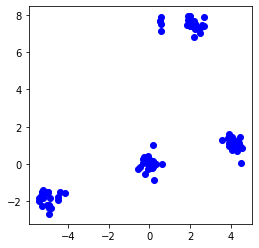

In [64]:
plt.figure(figsize=(4,4))
plt.scatter(data1['1'],data1['2'],c='b')

#### Q2) Use K-means to cluster the original data with k=5 clusters. Report the resulting labels. 

In [65]:
k_means=KMeans(n_clusters=5, n_init=10, random_state=0).fit(data1)
data1_labels_ = k_means.predict(data1)
data1['labels']=data1_labels_
data1


,1,2,labels
0,0.624358,-0.007694,3
1,2.090884,7.405251,2
2,2.498841,7.292161,2
3,2.009998,7.408158,2
4,2.236813,7.245803,2
...,...,...,...
95,-5.325878,-1.745953,1
96,-4.958599,-1.528477,1
97,-4.512952,-1.942676,1
98,-5.123277,-1.622498,1


#### Q3) Visualize the clustering result and color the points according to the labels obtained in part b)
hint: you can use the first two columns only

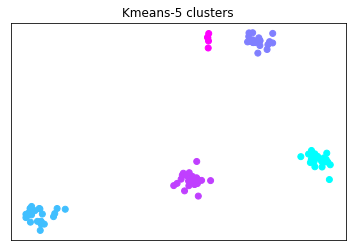

In [66]:
plt.scatter(data1['1'], data1['2'], c=data1_labels_, cmap=plt.cm.cool)
n=5
plt.xticks(())
plt.yticks(())
plt.title("Kmeans-{} clusters".format(n))
plt.show()

#### Q4) Justify the choice of k (the optimal number of clusters for K-means clustering; feel free to try k from 2 to 10) by first using silhouette_score and then the Elbow method on the original data. Briefly explain your approach

In [67]:
range_n_clusters = range(2,11)
data1=data1.iloc[:,:2]
for n_clusters in range_n_clusters: #try different numbers of clusters
    km = KMeans(n_clusters=n_clusters, random_state=324)
    cluster_labels = km.fit_predict(data1)
    #report average Silhouette score
    silhouette_avg = silhouette_score(data1, cluster_labels)
    print("For n_clusters ={},".format(n_clusters)+" the average silhouette_score is :{}".format(silhouette_avg))

For n_clusters =2, the average silhouette_score is :0.5704180170848508
For n_clusters =3, the average silhouette_score is :0.7446543472476302
For n_clusters =4, the average silhouette_score is :0.8806219682734302
For n_clusters =5, the average silhouette_score is :0.8445807368232318
For n_clusters =6, the average silhouette_score is :0.7279567557134302
For n_clusters =7, the average silhouette_score is :0.7617040683546824
For n_clusters =8, the average silhouette_score is :0.6145268244576092
For n_clusters =9, the average silhouette_score is :0.5126038521172481
For n_clusters =10, the average silhouette_score is :0.44190690992627013


By using different numbers of k range from 2 to 10, we can find that the highest average silhouette_score only in the situation that number of cluster euqals to 4. So k=4 is the optimal number of clusters for K-means clustering.

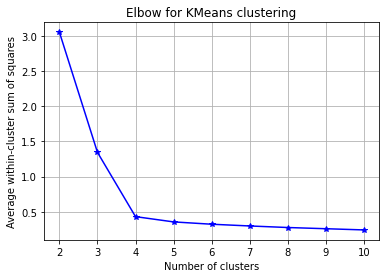

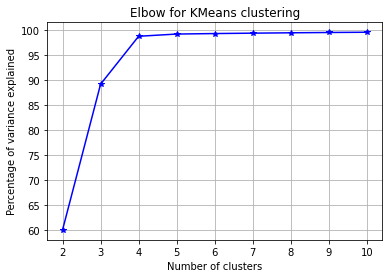

In [68]:
elbow(data1, range(2,11))

#### Q5) Use a Gaussian Mixture model instead of K-means with the optimal k found in Q4, visualize the resulting clustering

In [69]:
gm=GaussianMixture(n_components=4,random_state=324)
res1=gm.fit(data1)

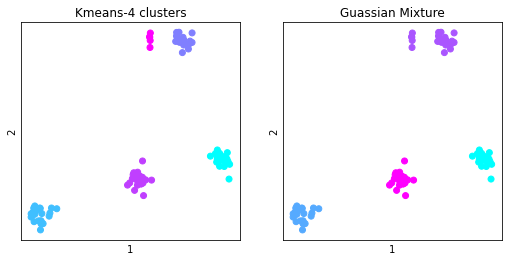

In [70]:
plt.figure(figsize=(18,4))

n=4
plt.subplot(1,4,2)
plt.scatter(data1['1'], data1['2'], c=data1_labels_, cmap=plt.cm.cool)
plt.xlabel('1')
plt.ylabel('2')
plt.xticks(())
plt.yticks(())
plt.title("Kmeans-{} clusters".format(n))

plt.subplot(1,4,3)
plt.scatter(data1['1'], data1['2'], c=res1.predict(data1), cmap=plt.cm.cool)
plt.xlabel('1')
plt.ylabel('2')
plt.xticks(())
plt.yticks(())
plt.title("Guassian Mixture")

plt.show()


# Cluster urban locations based on their mobility structrue (%% of trips by each mobility mode within the total trips per location)

In [71]:
#Upload the main dataset
SMdata=pd.read_csv("Socio-mobility.csv")

In [72]:
SMdata

,population,male,female,age_under_14,age_15_29,age_30_54,age_55_over,white,black,asian,...,unemployment_rate,percent_uninsured,mean_price_per_sqft,median_price_per_sqft,citibike_spatial,mobile-device_spatial,sr311_spatial,subway_spatial,taxi_spatial,twitter_spatial
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,0,383102,0,0.0,95418,1546
1,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,0,6348,0,0.0,73,44
2,32450.0,15235.0,17215.0,16.351856,20.033410,34.419509,29.195225,31.959938,35.189522,8.311248,...,10.045116,8.402712,318.691787,315.104167,0,109300,700,225527.5,31960,480
3,27571.0,12546.0,15025.0,12.032675,24.910563,38.007785,25.048977,40.201661,13.778971,14.185195,...,9.031957,8.955406,NaN,NaN,31545,179644,399,0.0,178515,85
4,26482.0,13082.0,13400.0,18.400166,17.316894,36.133183,28.149757,89.064270,1.771014,6.532739,...,5.503406,3.673850,289.552591,276.162791,0,56271,490,0.0,3667,40
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
258,44064.0,20502.0,23562.0,17.150757,22.004275,34.482983,26.361984,21.362110,61.555919,4.416304,...,10.602008,10.301060,247.453128,243.542911,0,461017,1142,1065402.0,43841,274
259,45702.0,23401.0,22301.0,16.373437,19.598034,39.453075,24.575453,46.781322,1.444138,39.753184,...,6.819275,18.911168,443.492147,441.390182,0,353643,754,3635465.0,138882,725
260,4537.0,1889.0,2648.0,9.890110,35.564436,47.552448,6.993007,68.415252,2.689002,21.071192,...,3.000000,4.000000,NaN,NaN,19131,258407,323,6178926.0,225140,523
261,35483.0,14871.0,20612.0,13.053496,18.493265,35.472574,32.980665,83.324409,4.512020,7.076628,...,3.683347,5.183719,725.503394,758.505298,13129,93861,283,0.0,315300,378


In [73]:
#rename some of the columns for the sake of consistency and also to replace '-'
SMdata.rename(columns={'mobile-device_spatial':'mobile','citibike_spatial':'citibike','sr311_spatial':'sr311','subway_spatial':'subway','taxi_spatial':'taxi','twitter_spatial':'twitter'},inplace=True)

In [74]:
SMdata

,population,male,female,age_under_14,age_15_29,age_30_54,age_55_over,white,black,asian,...,unemployment_rate,percent_uninsured,mean_price_per_sqft,median_price_per_sqft,citibike,mobile,sr311,subway,taxi,twitter
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,0,383102,0,0.0,95418,1546
1,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,0,6348,0,0.0,73,44
2,32450.0,15235.0,17215.0,16.351856,20.033410,34.419509,29.195225,31.959938,35.189522,8.311248,...,10.045116,8.402712,318.691787,315.104167,0,109300,700,225527.5,31960,480
3,27571.0,12546.0,15025.0,12.032675,24.910563,38.007785,25.048977,40.201661,13.778971,14.185195,...,9.031957,8.955406,NaN,NaN,31545,179644,399,0.0,178515,85
4,26482.0,13082.0,13400.0,18.400166,17.316894,36.133183,28.149757,89.064270,1.771014,6.532739,...,5.503406,3.673850,289.552591,276.162791,0,56271,490,0.0,3667,40
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
258,44064.0,20502.0,23562.0,17.150757,22.004275,34.482983,26.361984,21.362110,61.555919,4.416304,...,10.602008,10.301060,247.453128,243.542911,0,461017,1142,1065402.0,43841,274
259,45702.0,23401.0,22301.0,16.373437,19.598034,39.453075,24.575453,46.781322,1.444138,39.753184,...,6.819275,18.911168,443.492147,441.390182,0,353643,754,3635465.0,138882,725
260,4537.0,1889.0,2648.0,9.890110,35.564436,47.552448,6.993007,68.415252,2.689002,21.071192,...,3.000000,4.000000,NaN,NaN,19131,258407,323,6178926.0,225140,523
261,35483.0,14871.0,20612.0,13.053496,18.493265,35.472574,32.980665,83.324409,4.512020,7.076628,...,3.683347,5.183719,725.503394,758.505298,13129,93861,283,0.0,315300,378


In [75]:
#also upload two other datasets from the last class - residential and working population
LEHDW=pd.read_csv("LEHD-work.csv")

In [76]:
#notice that residetial population here (from LEHD, based on the workforce residences) 
#is different from the one in the main dataset 
LEHDR=pd.read_csv("LEHD-resident.csv")

In [77]:
#merge the dataframes (inner merge on index - taxi zone number); take only the columns to use later
SMdata=SMdata[['population','mobile','citibike','sr311','subway','taxi','twitter']].merge(LEHDW[['total']].rename(columns={'total':'working'}), on=None, left_index=True, right_index=True, how='inner')

In [78]:
SMdata=SMdata.merge(LEHDR[['total']].rename(columns={'total':'residential'}), on=None, left_index=True, right_index=True, how='inner')

In [79]:
#glimpse into the final data
SMdata.head()

,population,mobile,citibike,sr311,subway,taxi,twitter,working,residential
0,NaN,383102,0,0,0.0,95418,1546,4989,198
1,0.0,6348,0,0,0.0,73,44,2717,11398
2,32450.0,109300,0,700,225527.5,31960,480,1191,12318
3,27571.0,179644,31545,399,0.0,178515,85,2495,10751
4,26482.0,56271,0,490,0.0,3667,40,17223,6729


In [115]:
#read shapefiles of NYC taxi zones
tzs=gpd.read_file("taxizone.geojson")
tzs.location_id = tzs.location_id.astype(int)
tzs.shape_area = tzs.shape_area.astype(float)

In [116]:
tzs.head()

,shape_area,objectid,shape_leng,location_id,zone,borough,geometry
0,0.000782,1,0.116357453189,1,Newark Airport,EWR,"MULTIPOLYGON (((-74.18445 40.69500, -74.18449 ..."
1,0.004866,2,0.43346966679,2,Jamaica Bay,Queens,"MULTIPOLYGON (((-73.82338 40.63899, -73.82277 ..."
2,0.000314,3,0.0843411059012,3,Allerton/Pelham Gardens,Bronx,"MULTIPOLYGON (((-73.84793 40.87134, -73.84725 ..."
3,0.000112,4,0.0435665270921,4,Alphabet City,Manhattan,"MULTIPOLYGON (((-73.97177 40.72582, -73.97179 ..."
4,0.000498,5,0.0921464898574,5,Arden Heights,Staten Island,"MULTIPOLYGON (((-74.17422 40.56257, -74.17349 ..."


In [117]:
tzs=tzs.merge(SMdata,left_on='location_id', right_index=True, how='inner')

In [118]:
ML=SMdata.columns

In [119]:
tzs

,shape_area,objectid,shape_leng,location_id,zone,borough,geometry,population,mobile,citibike,sr311,subway,taxi,twitter,working,residential
0,0.000782,1,0.116357453189,1,Newark Airport,EWR,"MULTIPOLYGON (((-74.18445 40.69500, -74.18449 ...",0.0,6348,0,0,0.0,73,44,2717,11398
1,0.004866,2,0.43346966679,2,Jamaica Bay,Queens,"MULTIPOLYGON (((-73.82338 40.63899, -73.82277 ...",32450.0,109300,0,700,225527.5,31960,480,1191,12318
2,0.000314,3,0.0843411059012,3,Allerton/Pelham Gardens,Bronx,"MULTIPOLYGON (((-73.84793 40.87134, -73.84725 ...",27571.0,179644,31545,399,0.0,178515,85,2495,10751
3,0.000112,4,0.0435665270921,4,Alphabet City,Manhattan,"MULTIPOLYGON (((-73.97177 40.72582, -73.97179 ...",26482.0,56271,0,490,0.0,3667,40,17223,6729
4,0.000498,5,0.0921464898574,5,Arden Heights,Staten Island,"MULTIPOLYGON (((-74.17422 40.56257, -74.17349 ...",15896.0,147674,0,255,0.0,7456,88,11,43048
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
254,0.000626,251,0.1377111611,251,Westerleigh,Staten Island,"MULTIPOLYGON (((-74.13107 40.63115, -74.13059 ...",31090.0,179788,0,686,0.0,28403,298,8362,24411
255,0.001025,252,0.158004373564,252,Whitestone,Queens,"MULTIPOLYGON (((-73.82050 40.80101, -73.82040 ...",0.0,45446,0,42,0.0,5834,18,4496,11668
256,0.000360,254,0.0858863754861,254,Williamsbridge/Olinville,Bronx,"MULTIPOLYGON (((-73.85187 40.87906, -73.85138 ...",19482.0,176863,76933,830,2571984.5,402710,431,41652,11433
257,0.000172,255,0.0623841997664,255,Williamsburg (North Side),Brooklyn,"MULTIPOLYGON (((-73.96176 40.72523, -73.96154 ...",34848.0,283777,41494,945,4608503.0,281700,169,8109,25376


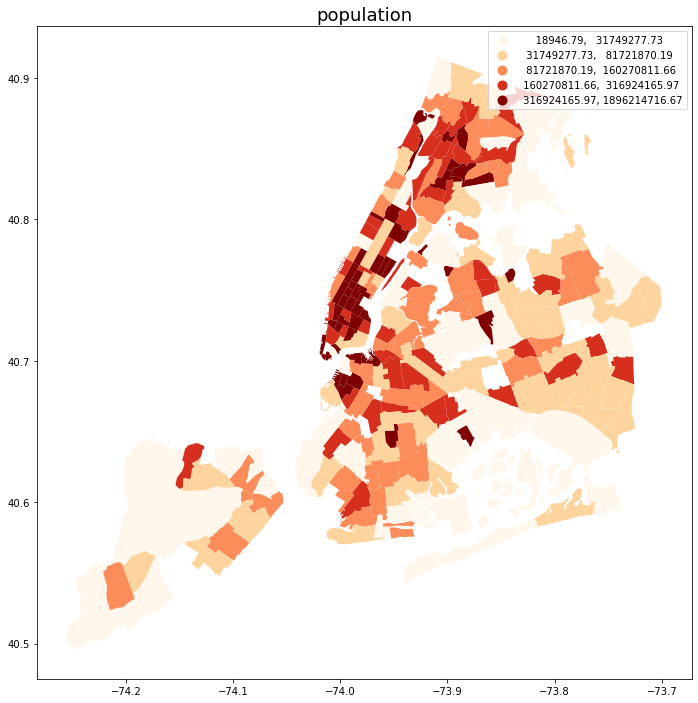

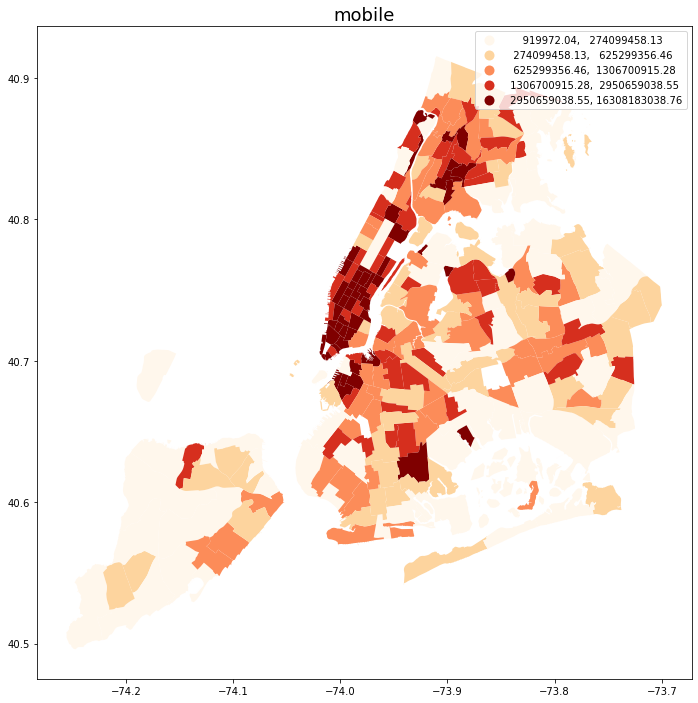

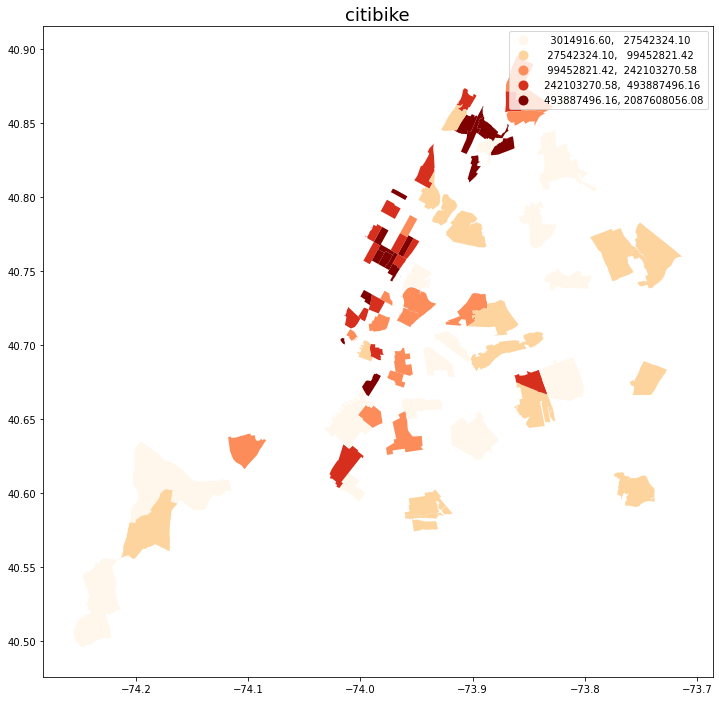

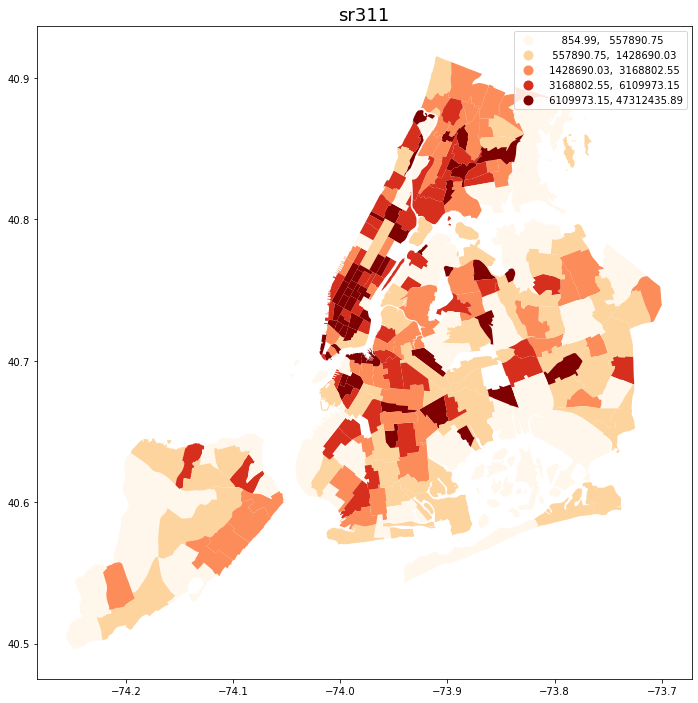

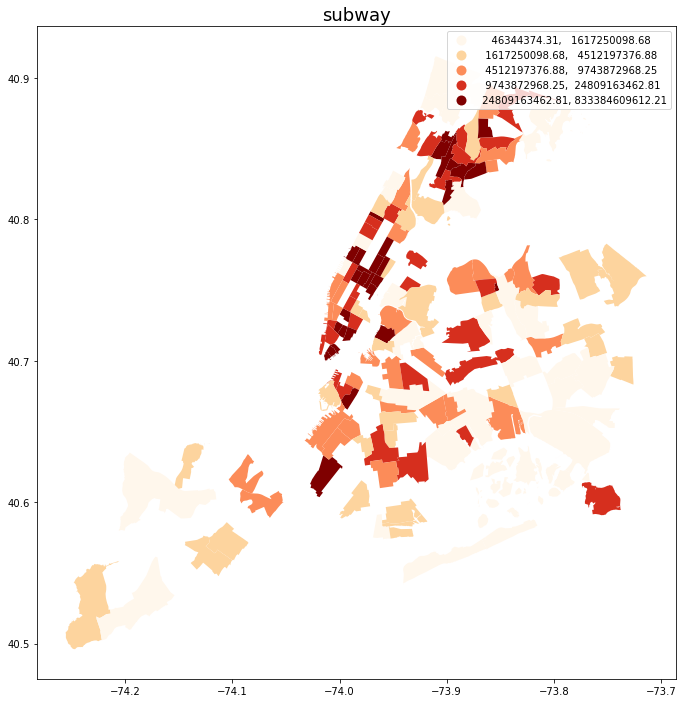

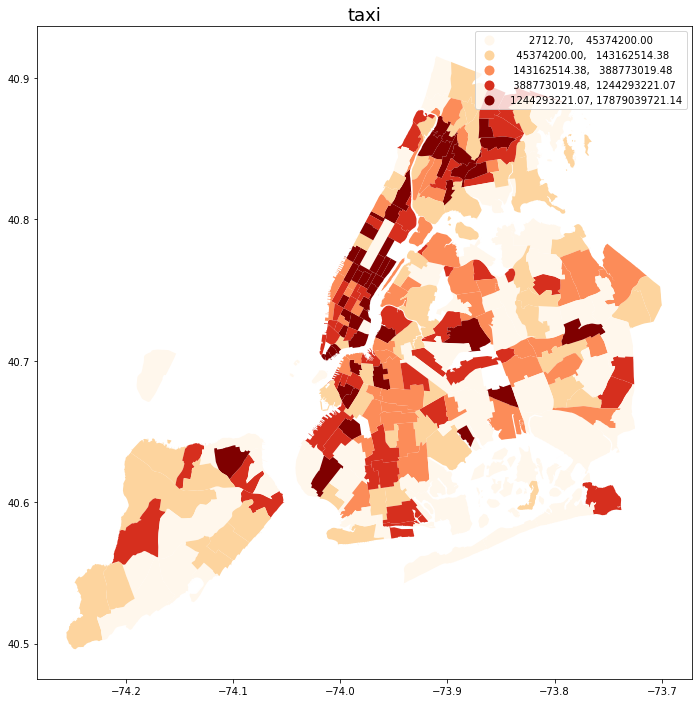

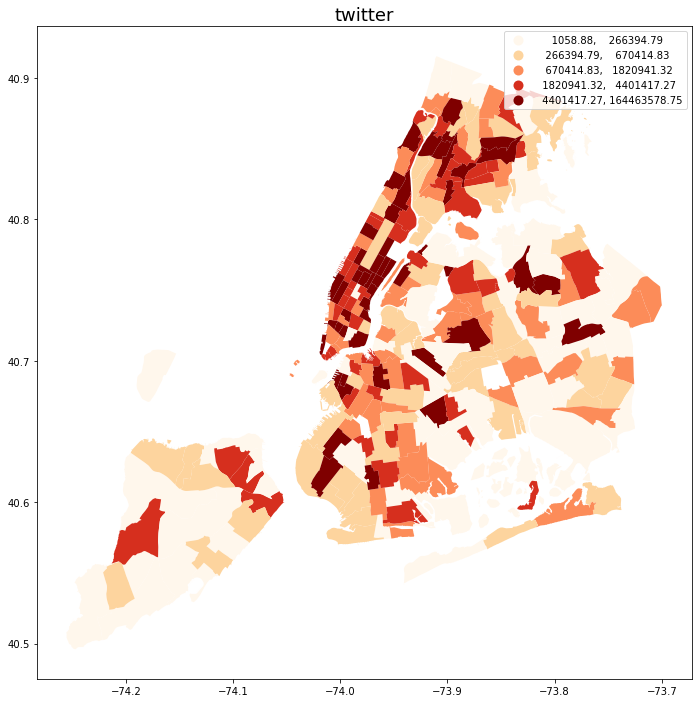

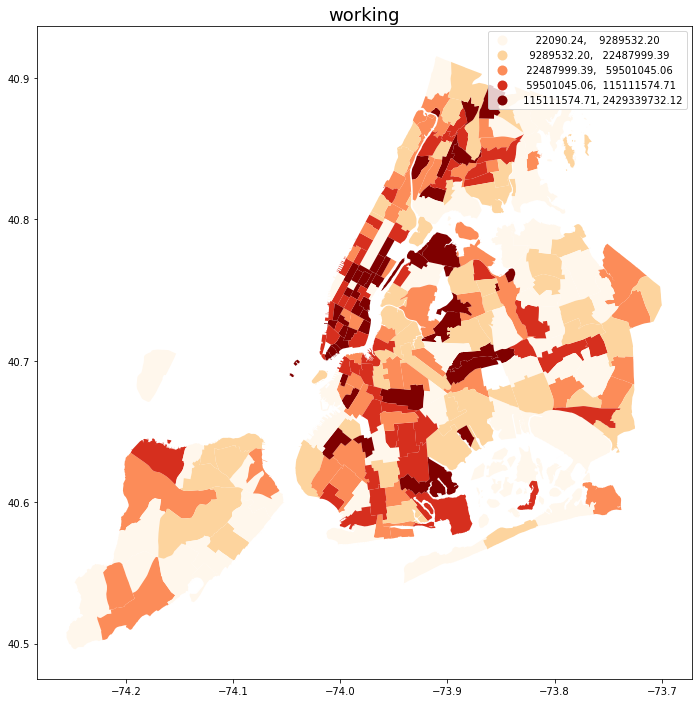

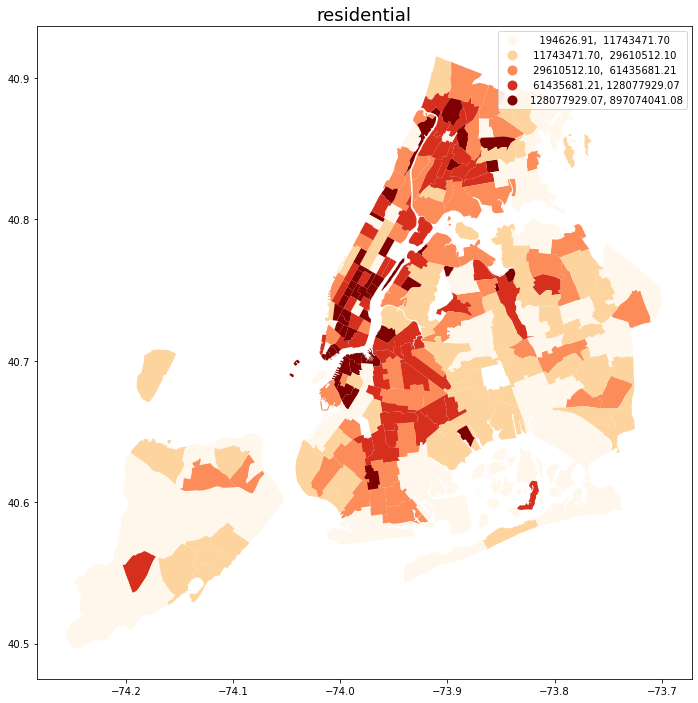

In [85]:
#visualize mobilty heatmaps
for M in ML:
    f, ax = plt.subplots(1, figsize=(12, 12))
    ax.set_title(M, fontsize=18)
    tzs['X']=tzs[M]/tzs.shape_area
    tzs[tzs[M]>0].plot(axes=ax, column='X', scheme='quantiles', legend = True, cmap='OrRd')

In [86]:
#use only taxi, subway and citibike for the clustering analysis
TM=['taxi','subway','citibike']

In [87]:
#normalize the ridership
normRide=tzs[TM].div(tzs[TM].sum(axis=1), axis=0).dropna()
normRide

,taxi,subway,citibike
0,1.000000,0.000000,0.000000
1,0.124123,0.875877,0.000000
2,0.849829,0.000000,0.150171
3,1.000000,0.000000,0.000000
4,1.000000,0.000000,0.000000
...,...,...,...
254,1.000000,0.000000,0.000000
255,1.000000,0.000000,0.000000
256,0.131966,0.842824,0.025210
257,0.057120,0.934466,0.008414


In [88]:
tzs2=tzs.merge(normRide,left_index=True, right_index=True, how='inner', suffixes=['','_norm'])

In [89]:
tzs2.head()

,shape_area,objectid,shape_leng,location_id,zone,borough,geometry,population,mobile,citibike,sr311,subway,taxi,twitter,working,residential,X,taxi_norm,subway_norm,citibike_norm
0,0.000782,1,0.116357453189,1,Newark Airport,EWR,"MULTIPOLYGON (((-74.18445 40.69500, -74.18449 ...",0.0,6348,0,0,0.0,73,44,2717,11398,1.456973e+07,1.000000,0.000000,0.000000
1,0.004866,2,0.43346966679,2,Jamaica Bay,Queens,"MULTIPOLYGON (((-73.82338 40.63899, -73.82277 ...",32450.0,109300,0,700,225527.5,31960,480,1191,12318,2.531266e+06,0.124123,0.875877,0.000000
2,0.000314,3,0.0843411059012,3,Allerton/Pelham Gardens,Bronx,"MULTIPOLYGON (((-73.84793 40.87134, -73.84725 ...",27571.0,179644,31545,399,0.0,178515,85,2495,10751,3.419375e+07,0.849829,0.000000,0.150171
3,0.000112,4,0.0435665270921,4,Alphabet City,Manhattan,"MULTIPOLYGON (((-73.97177 40.72582, -73.97179 ...",26482.0,56271,0,490,0.0,3667,40,17223,6729,6.014913e+07,1.000000,0.000000,0.000000
4,0.000498,5,0.0921464898574,5,Arden Heights,Staten Island,"MULTIPOLYGON (((-74.17422 40.56257, -74.17349 ...",15896.0,147674,0,255,0.0,7456,88,11,43048,8.644915e+07,1.000000,0.000000,0.000000


#### Q1) Cluster the city locations based on taxi/subway/citibike ridership proportion
Use k=4 clusters and the Gausian Mixture algorithm. Visualize the result on the map

Text(0.5, 1.0, 'Gausian Mixture algorithm_ Based on Taxi')

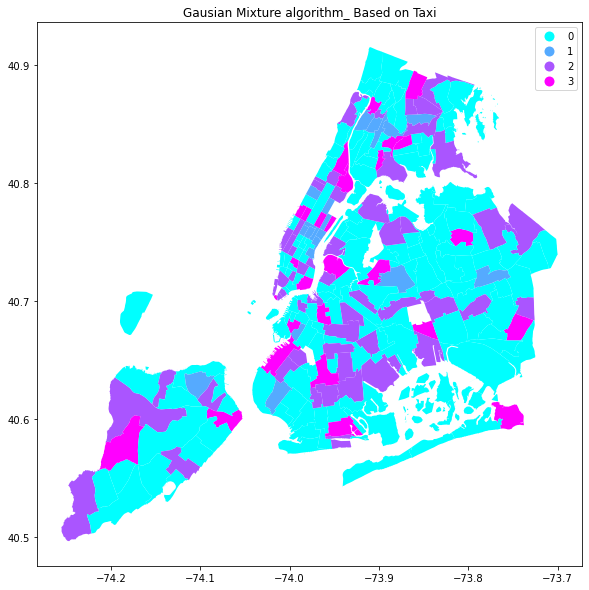

In [90]:
city_taxi=tzs.loc[:,['taxi']]
Gaussian= GaussianMixture(n_components = 4, random_state = 0).fit(city_taxi)
taxi_label=Gaussian.predict(city_taxi)
city_taxi=tzs
city_taxi['label']=taxi_label
city_taxi['label'] =city_taxi['label'].astype(str)
fig,ax = plt.subplots(nrows=1, ncols=1,figsize=(20,10))
city_taxi.plot(column='label',cmap='cool',legend=True,ax=ax)
plt.title('Gausian Mixture algorithm_ Based on Taxi')

Text(0.5, 1.0, 'Gausian Mixture algorithm_ Based on Subway')

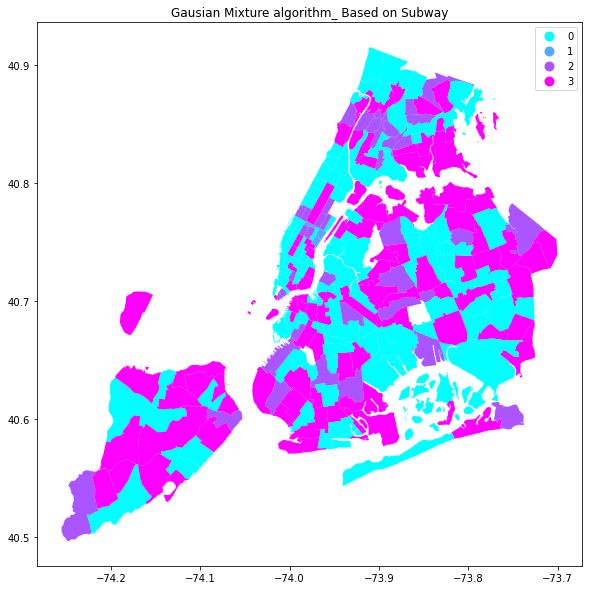

In [91]:
city_subway=tzs.loc[:,['subway']]
Gaussian= GaussianMixture(n_components = 4, random_state = 0).fit(city_subway)
subway_label=Gaussian.predict(city_subway)
city_subway=tzs
city_subway['label']=subway_label
city_subway['label'] =city_subway['label'].astype(str)
fig,ax = plt.subplots(nrows=1, ncols=1,figsize=(20,10))
city_subway.plot(column='label',cmap='cool',legend=True,ax=ax)
plt.title('Gausian Mixture algorithm_ Based on Subway')

Text(0.5, 1.0, 'Gausian Mixture algorithm_ Based on Citibike')

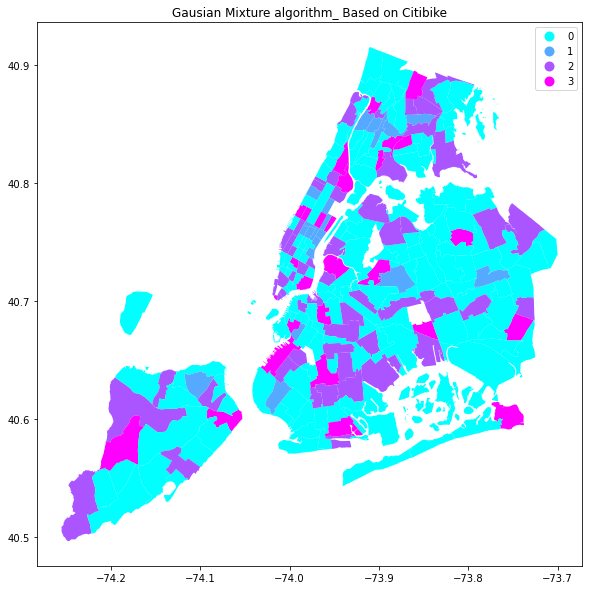

In [92]:
city_citibike=tzs.loc[:,['citibike']]
Gaussian= GaussianMixture(n_components = 4, random_state = 0).fit(city_citibike)
citibike_label=Gaussian.predict(city_citibike)
city_citibike=tzs
city_citibike['label']=citibike_label
city_citibike['label'] =city_citibike['label'].astype(str)
fig,ax = plt.subplots(nrows=1, ncols=1,figsize=(20,10))
city_citibike.plot(column='label',cmap='cool',legend=True,ax=ax)
plt.title('Gausian Mixture algorithm_ Based on Citibike')

In [93]:
city_location=tzs.loc[:,['taxi','subway','citibike']]
Gaussian= GaussianMixture(n_components = 4, random_state = 0).fit(city_location)
G_label=Gaussian.predict(city_location)
city_Gaussian=tzs
city_Gaussian['label']=G_label

Text(0.5, 1.0, 'Gausian Mixture algorithm')

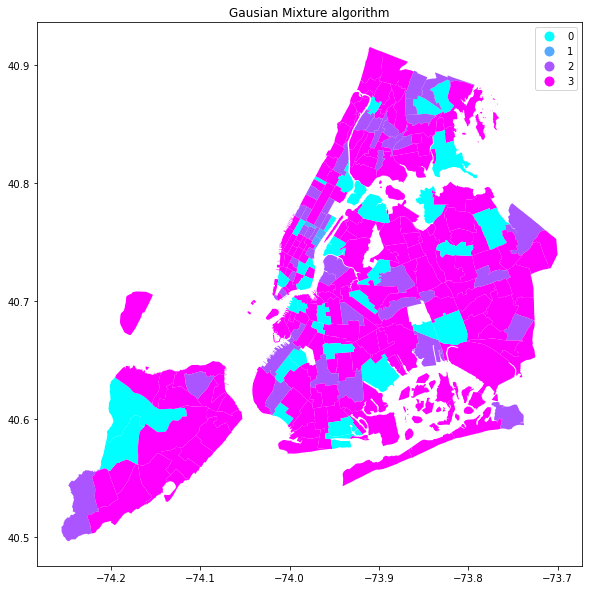

In [94]:
city_Gaussian['label'] = city_Gaussian['label'].astype(str)
fig,ax = plt.subplots(nrows=1, ncols=1,figsize=(20,10))
city_Gaussian.plot(column='label',cmap='cool',legend=True,ax=ax)
plt.title('Gausian Mixture algorithm')

In [95]:
city_norm=tzs2.loc[:,['taxi_norm','subway_norm','citibike_norm']]
Gaussian_norm= GaussianMixture(n_components = 4, random_state = 0).fit(city_norm)
G_norm=Gaussian_norm.predict(city_norm)
city_Gaussiannorm=tzs2
city_Gaussiannorm['label']=G_norm

Text(0.5, 1.0, 'Gausian Mixture algorithm--Nromalize data')

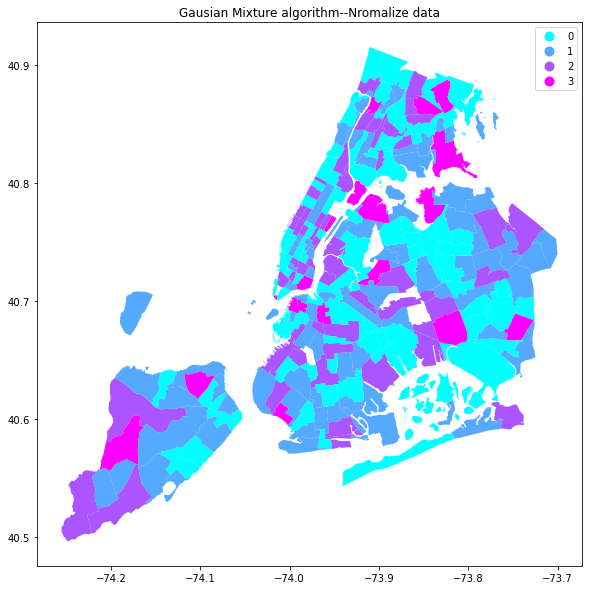

In [96]:
city_Gaussiannorm['label'] = city_Gaussiannorm['label'].astype(str)
fig,ax = plt.subplots(nrows=1, ncols=1,figsize=(20,10))
city_Gaussiannorm.plot(column='label',cmap='cool',legend=True,ax=ax)
plt.title('Gausian Mixture algorithm--Nromalize data')

Text(0.5, 1.0, 'Kmeans_ Based on Taxi')

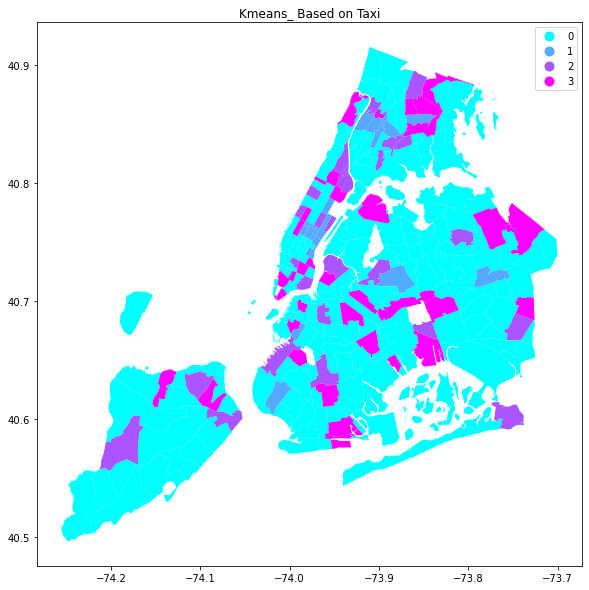

In [120]:
city_taxi=tzs.loc[:,['taxi']]
k_means=KMeans(n_clusters=4, n_init=10, random_state=0).fit(city_taxi)
taxi_label=k_means.fit_predict(city_taxi)
city_taxi=tzs
city_taxi['label']=taxi_label
city_taxi['label'] =city_taxi['label'].astype(str)
fig,ax = plt.subplots(nrows=1, ncols=1,figsize=(20,10))
city_taxi.plot(column='label',cmap='cool',legend=True,ax=ax)
plt.title('Kmeans_ Based on Taxi')

Text(0.5, 1.0, 'Kmeans_ Based on Subway')

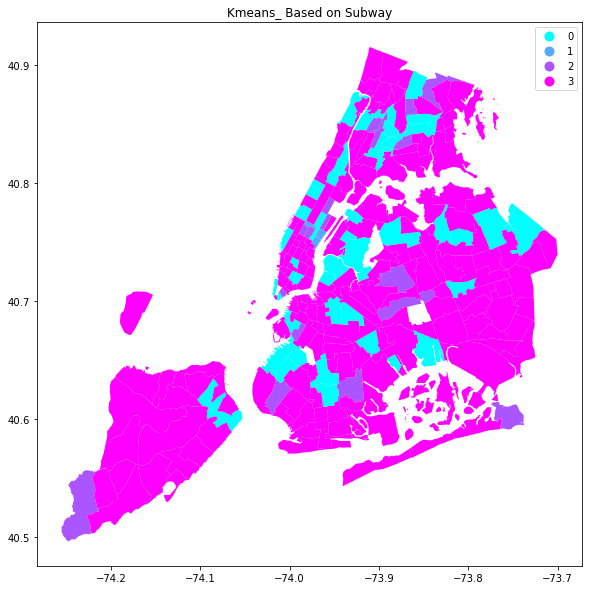

In [121]:
city_subway=tzs.loc[:,['subway']]
k_means=KMeans(n_clusters=4, n_init=10, random_state=0).fit(city_subway)
subway_label=k_means.fit_predict(city_subway)
city_subway=tzs
city_subway['label']=subway_label
city_subway['label'] =city_subway['label'].astype(str)
fig,ax = plt.subplots(nrows=1, ncols=1,figsize=(20,10))
city_subway.plot(column='label',cmap='cool',legend=True,ax=ax)
plt.title('Kmeans_ Based on Subway')

Text(0.5, 1.0, 'Kmeans_ Based on Citibike')

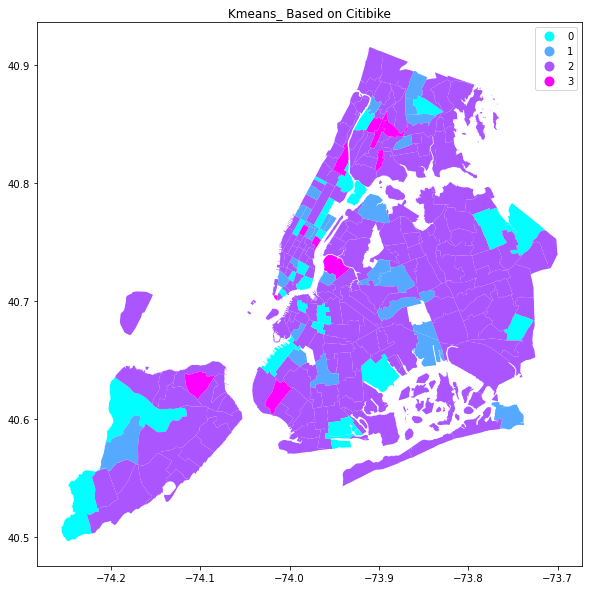

In [123]:
city_citibike=tzs.loc[:,['citibike']]
k_means=KMeans(n_clusters=4, n_init=10, random_state=0).fit(city_citibike)
citibike_label=k_means.fit_predict(city_citibike)
city_citibike=tzs
city_citibike['label']=citibike_label
city_citibike['label'] =city_citibike['label'].astype(str)
fig,ax = plt.subplots(nrows=1, ncols=1,figsize=(20,10))
city_citibike.plot(column='label',cmap='cool',legend=True,ax=ax)
plt.title('Kmeans_ Based on Citibike')

In [97]:
k_means=KMeans(n_clusters=4, n_init=10, random_state=0).fit(city_location)
K_label=k_means.fit_predict(city_location)
city_K=tzs
city_K['label']=K_label

Text(0.5, 1.0, 'Kmeans')

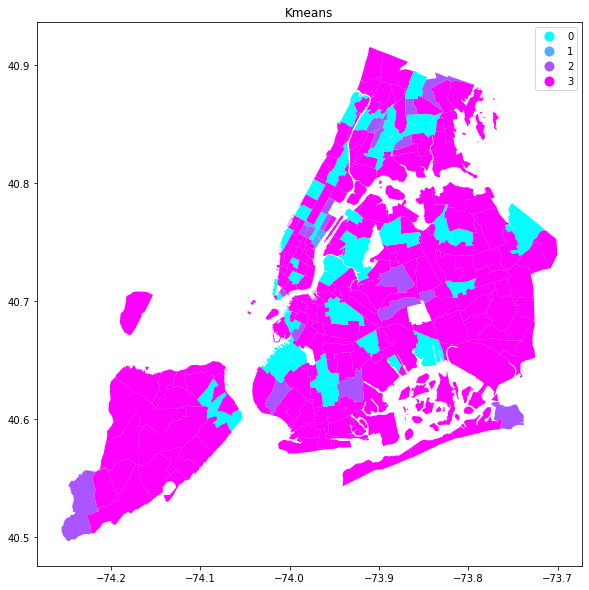

In [98]:
city_K['label'] = city_K['label'].astype(str)
fig,ax = plt.subplots(nrows=1, ncols=1,figsize=(20,10))
city_K.plot(column='label',cmap='cool',legend=True,ax=ax)
plt.title('Kmeans')

#### Q2). Characterize each cluster with its overall mobility decomposition
Compute total usage of each mobility mode within each cluster, get the percentages by mode within the cluster and visualize the results as a bar plot - one bar per cluster colored by the proportions of each mode trips to the total mobility; same way as for the 311 complaints structure in the lab)

In [99]:
SMNormalized=SMdata.div(SMdata.sum(axis=1), axis=0)
SMNormalized=SMNormalized.dropna()

In [100]:
Model_G = GaussianMixture(n_components = 4, random_state = 0).fit(SMNormalized)
SM_Guassianlabel = Model_G.predict(SMNormalized) #get labels

In [101]:
SMdata_Gaussian=SMdata.dropna()
SMdata_Gaussian['label']=SM_Guassianlabel

In [102]:
Clust_sm=SMdata_Gaussian.groupby(['label']).sum().reset_index()
Clust_sm = Clust_sm[[col for col in Clust_sm.columns if col not in ['label']]]
Clust_sm = Clust_sm.div(Clust_sm.sum(axis=1), axis=0)
Clust_sm['label'] = [0,1,2,3]

In [103]:
tzs=gpd.read_file("taxizone.geojson")
tzs.location_id = tzs.location_id.astype(int)
tzs.shape_area = tzs.shape_area.astype(float)

In [104]:
Clust_plot=tzs.merge(SMdata_Gaussian,left_on='location_id', right_index=True, how='inner')
Clust_plot

,shape_area,objectid,shape_leng,location_id,zone,borough,geometry,population,mobile,citibike,sr311,subway,taxi,twitter,working,residential,label
0,0.000782,1,0.116357453189,1,Newark Airport,EWR,"MULTIPOLYGON (((-74.18445 40.69500, -74.18449 ...",0.0,6348,0,0,0.0,73,44,2717,11398,3
1,0.004866,2,0.43346966679,2,Jamaica Bay,Queens,"MULTIPOLYGON (((-73.82338 40.63899, -73.82277 ...",32450.0,109300,0,700,225527.5,31960,480,1191,12318,2
2,0.000314,3,0.0843411059012,3,Allerton/Pelham Gardens,Bronx,"MULTIPOLYGON (((-73.84793 40.87134, -73.84725 ...",27571.0,179644,31545,399,0.0,178515,85,2495,10751,3
3,0.000112,4,0.0435665270921,4,Alphabet City,Manhattan,"MULTIPOLYGON (((-73.97177 40.72582, -73.97179 ...",26482.0,56271,0,490,0.0,3667,40,17223,6729,0
4,0.000498,5,0.0921464898574,5,Arden Heights,Staten Island,"MULTIPOLYGON (((-74.17422 40.56257, -74.17349 ...",15896.0,147674,0,255,0.0,7456,88,11,43048,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
254,0.000626,251,0.1377111611,251,Westerleigh,Staten Island,"MULTIPOLYGON (((-74.13107 40.63115, -74.13059 ...",31090.0,179788,0,686,0.0,28403,298,8362,24411,0
255,0.001025,252,0.158004373564,252,Whitestone,Queens,"MULTIPOLYGON (((-73.82050 40.80101, -73.82040 ...",0.0,45446,0,42,0.0,5834,18,4496,11668,0
256,0.000360,254,0.0858863754861,254,Williamsbridge/Olinville,Bronx,"MULTIPOLYGON (((-73.85187 40.87906, -73.85138 ...",19482.0,176863,76933,830,2571984.5,402710,431,41652,11433,2
257,0.000172,255,0.0623841997664,255,Williamsburg (North Side),Brooklyn,"MULTIPOLYGON (((-73.96176 40.72523, -73.96154 ...",34848.0,283777,41494,945,4608503.0,281700,169,8109,25376,1


Text(0.5, 1.0, 'Gausian Mixture algorithm')

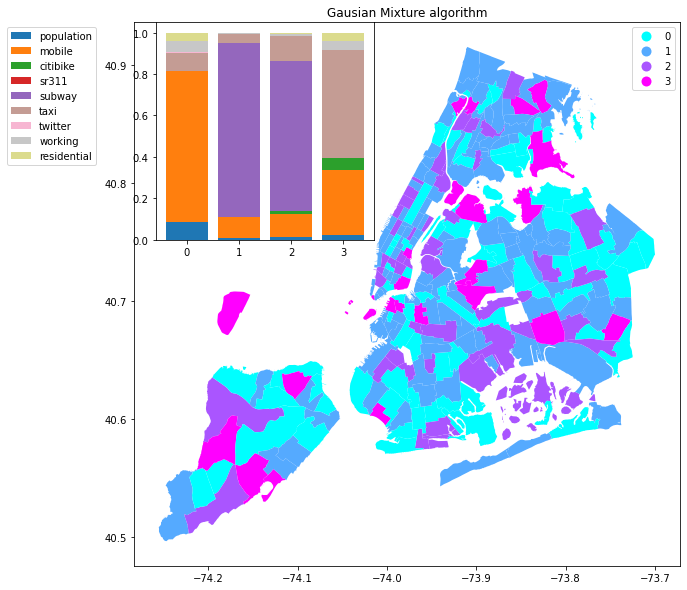

In [105]:
Clust_plot['label'] = Clust_plot['label'].astype(str)
fig,ax = plt.subplots(nrows=1, ncols=1,figsize=(20,10))
Clust_plot.plot(column='label',cmap='cool',legend=True,ax=ax)

ins = ax.inset_axes([0.04,0.6,0.4,0.4])
NUM_COLORS = len(Clust_sm.columns)
cm = plt.cm.get_cmap('tab20', NUM_COLORS)

ins.set_prop_cycle(color = [cm(1.*i/NUM_COLORS) for i in range(NUM_COLORS)])
bot = np.zeros(4)


for col in Clust_sm.columns:
    if col!= 'label':
        values = Clust_sm[col].values
        ins.bar([0,1,2,3], values, bottom = bot, label=col)
        bot = bot + values
ins.set_xticks([0,1,2,3])    
ins.legend(bbox_to_anchor=(-0.25, 1)) 
plt.title('Gausian Mixture algorithm')

In [106]:
Model_K = KMeans(n_clusters=4, n_init=10, random_state=0).fit(SMNormalized)
SM_Kmeans = Model_K.predict(SMNormalized) #get labels

In [107]:
SMdata_K=SMdata.dropna()
SMdata_K['label']=SM_Kmeans

In [108]:
Clust_Kmean=SMdata_K.groupby(['label']).sum().reset_index()
Clust_Kmean = Clust_Kmean[[col for col in Clust_sm.columns if col not in ['label']]]
Clust_Kmean = Clust_Kmean.div(Clust_sm.sum(axis=1), axis=0)
Clust_Kmean['label'] = [0,1,2,3]

In [109]:
tzs=gpd.read_file("taxizone.geojson")
tzs.location_id = tzs.location_id.astype(int)
tzs.shape_area = tzs.shape_area.astype(float)

In [110]:
Clust_K=tzs.merge(SMdata_K,left_on='location_id', right_index=True, how='inner')
Clust_K

,shape_area,objectid,shape_leng,location_id,zone,borough,geometry,population,mobile,citibike,sr311,subway,taxi,twitter,working,residential,label
0,0.000782,1,0.116357453189,1,Newark Airport,EWR,"MULTIPOLYGON (((-74.18445 40.69500, -74.18449 ...",0.0,6348,0,0,0.0,73,44,2717,11398,3
1,0.004866,2,0.43346966679,2,Jamaica Bay,Queens,"MULTIPOLYGON (((-73.82338 40.63899, -73.82277 ...",32450.0,109300,0,700,225527.5,31960,480,1191,12318,0
2,0.000314,3,0.0843411059012,3,Allerton/Pelham Gardens,Bronx,"MULTIPOLYGON (((-73.84793 40.87134, -73.84725 ...",27571.0,179644,31545,399,0.0,178515,85,2495,10751,3
3,0.000112,4,0.0435665270921,4,Alphabet City,Manhattan,"MULTIPOLYGON (((-73.97177 40.72582, -73.97179 ...",26482.0,56271,0,490,0.0,3667,40,17223,6729,1
4,0.000498,5,0.0921464898574,5,Arden Heights,Staten Island,"MULTIPOLYGON (((-74.17422 40.56257, -74.17349 ...",15896.0,147674,0,255,0.0,7456,88,11,43048,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
254,0.000626,251,0.1377111611,251,Westerleigh,Staten Island,"MULTIPOLYGON (((-74.13107 40.63115, -74.13059 ...",31090.0,179788,0,686,0.0,28403,298,8362,24411,1
255,0.001025,252,0.158004373564,252,Whitestone,Queens,"MULTIPOLYGON (((-73.82050 40.80101, -73.82040 ...",0.0,45446,0,42,0.0,5834,18,4496,11668,1
256,0.000360,254,0.0858863754861,254,Williamsbridge/Olinville,Bronx,"MULTIPOLYGON (((-73.85187 40.87906, -73.85138 ...",19482.0,176863,76933,830,2571984.5,402710,431,41652,11433,2
257,0.000172,255,0.0623841997664,255,Williamsburg (North Side),Brooklyn,"MULTIPOLYGON (((-73.96176 40.72523, -73.96154 ...",34848.0,283777,41494,945,4608503.0,281700,169,8109,25376,2


Text(0.5, 1.0, 'Kmeans')

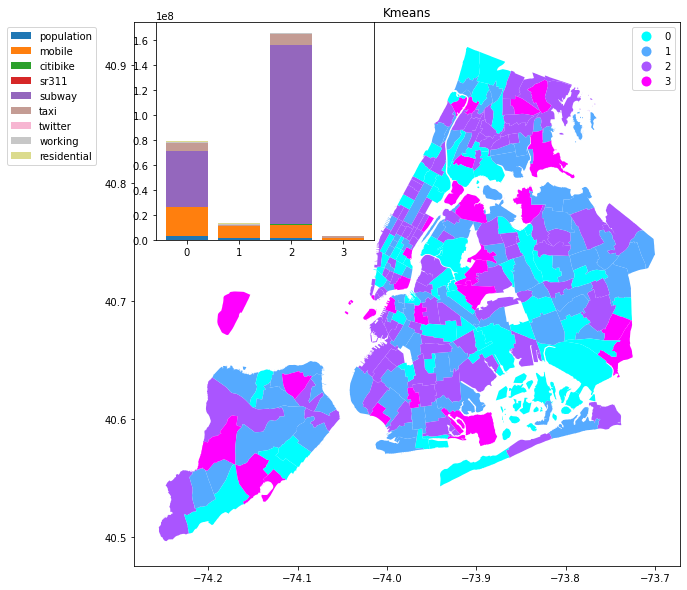

In [111]:
Clust_K['label'] = Clust_K['label'].astype(str)
fig,ax = plt.subplots(nrows=1, ncols=1,figsize=(20,10))
Clust_K.plot(column='label',cmap='cool',legend=True,ax=ax)

ins = ax.inset_axes([0.04,0.6,0.4,0.4])
NUM_COLORS = len(Clust_sm.columns)
cm = plt.cm.get_cmap('tab20', NUM_COLORS)

ins.set_prop_cycle(color = [cm(1.*i/NUM_COLORS) for i in range(NUM_COLORS)])
bot = np.zeros(4)


for col in Clust_Kmean.columns:
    if col!= 'label':
        values = Clust_Kmean[col].values
        ins.bar([0,1,2,3], values, bottom = bot, label=col)
        bot = bot + values
ins.set_xticks([0,1,2,3])    
ins.legend(bbox_to_anchor=(-0.25, 1)) 
plt.title('Kmeans')